In [ ]:
!pip install pydantic langchain langgraph langchain-core langchain-community python-dotenv langchain-groq arxiv wikipedia

  Using cached langgraph-0.4.5-py3-none-any.whl.metadata (7.3 kB)
  Using cached langchain_community-0.3.24-py3-none-any.whl.metadata (2.5 kB)
  Using cached python_dotenv-1.1.0-py3-none-any.whl.metadata (24 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 6.1 MB/s eta 0:0

In [ ]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ["GROQ_API_KEY"] = "Your API key here"
os.environ["TAVILY_API_KEY"] = "Your API Key here"

#arXiv
Hosting and reading academic research papers

In [ ]:
## tools
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [ ]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)

arxiv


In [ ]:
arxiv.invoke("What is latest advancement in Agentic AI systems")

'Published: 2023-12-23\nTitle: Human-AI Collaboration in Real-World Complex Environment with Reinforcement Learning\nAuthors: Md Saiful Islam, Srijita Das, Sai Krishna Gottipati, William Duguay, Clodéric Mars, Jalal Arabneydi, Antoine Fagette, Matthew Guzdial, Matthew-E-Taylor\nSummary: Recent advances in reinforcement learning (RL) and Human-in-the-Loop (HitL)\nlearning have made human-AI collaboration easier for humans to team with AI\nagents. Leveraging human expertise and experience with AI in int'

#Wikipedia

 retrieve background knowledge, summaries

In [ ]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


In [ ]:
wiki.invoke("Agentic AI systems update")

'Page: Multi-agent system\nSummary: A multi-agent system (MAS or "self-organized system") is a computerized system composed of multiple interacting intelligent agents. Multi-agent systems can solve problems that are difficult or impossible for an individual agent or a monolithic system to solve. Intelligence may include methodic, functional, procedural approaches, algorithmic search or reinforcement learning. With advancements in large language models (LLMs), LLM-based multi-agent systems have eme'

#Tavily
Real-time web search for AI agents
(retrieve real-time information from the internet)

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()
print(tavily.name)

tavily_search_results_json


In [ ]:
tavily.invoke("Provide me the frameworks of agentic ai applications")

[{'title': 'Best 5 Frameworks To Build Multi-Agent AI Applications - GetStream.io',
  'url': 'https://getstream.io/blog/multiagent-ai-frameworks/',
  'content': "There are several ways to build an AI agent from scratch. Agents can be built in Python or using React and other technology stacks. However, agentic frameworks like Agno, OpenAI Swarm, LangGraph, Microsoft Autogen, CrewAI, Vertex AI, and Langflow provide tremendous benefits. These frameworks have pre-packaged tools and features to help you quickly build any AI assistant. [...] To learn more about these limitations, see LangChain's State of AI Agent—2024.\nTop 5 Multi-Agent AI Frameworks\nYou can use several Python frameworks to create and add agents to applications and services. These frameworks include no-code (visual AI agent builders), low-code, and medium-code tools. This section presents five leading Python-based agent builders you can choose depending on your enterprise's or business's needs.\n1. Agno [...] You will see 

In [ ]:
tools = [arxiv, wiki, tavily]

In [ ]:
!pip install langchain-groq

#Large Language Model with tools

In [ ]:
## Initialization of LLM
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen-qwq-32b")

In [ ]:
llm.invoke("How do agents and tools collaborate intelligently?")

AIMessage(content='\n<think>\nOkay, so the user is asking how agents and tools collaborate intelligently. Let me start by breaking this down. First, I need to understand what they mean by "agents" and "tools." In the context of AI, agents are usually software systems that can act autonomously to some extent, like chatbots or personal assistants. Tools might be specific programs or APIs they use to perform tasks. \n\nI should probably start by defining both agents and tools to set the foundation. Agents are decision-making entities, right? They have goals and use perception and action to achieve them. Tools are the resources they use to perform tasks. So collaboration between them means that agents use tools effectively to reach their objectives. But how exactly does that work?\n\nMaybe I should think about different models or frameworks. There\'s the idea of task decomposition, where a big task is split into smaller parts that each agent or tool can handle. Like, if an agent needs to b

In [ ]:
llm_with_tools = llm.bind_tools(tools=tools)

In [ ]:
llm_with_tools.invoke("What is the recent news on AI")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_cd6f', 'function': {'arguments': '{"query": "recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 188, 'prompt_tokens': 355, 'total_tokens': 543, 'completion_time': 0.471734038, 'prompt_time': 0.038723173, 'queue_time': 0.5527038870000001, 'total_time': 0.510457211}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--bace47ac-6e5a-4391-9637-634bdaa1fe30-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news on AI'}, 'id': 'call_cd6f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 355, 'output_tokens': 188, 'total_tokens': 543})

#Workflow

In [ ]:
# State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage # Human message or AI message
from typing import Annotated # Labelling
from langgraph.graph.message import add_messages # Reducers in langgraph

In [ ]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [ ]:
def tool_calling_llm(state:State):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build Graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

# Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_edge("tools", END)

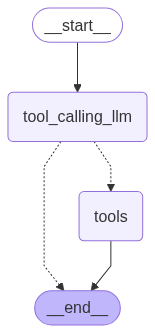

In [ ]:
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
from langchain_core.messages import HumanMessage

In [ ]:
messages = graph.invoke({"messages":HumanMessage(content="1706.03762")})
for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_8p9n)
 Call ID: call_8p9n
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [ ]:
messages = graph.invoke({"messages":HumanMessage(content="Hey, my name is Shayan, I am an AI Engineer")})
for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================

Hey, my name is Shayan, I am an AI Engineer
================================== Ai Message ==================================

Hello Shayan! Nice to meet you. It's great that you're an AI Engineer—what kind of projects are you currently working on or interested in within the field of AI?


In [ ]:
messages = graph.invoke({"messages":HumanMessage(content="I am currently working on Agentic AI Applications")})
for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================

I am currently working on Agentic AI Applications
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_0qs8)
 Call ID: call_0qs8
  Args:
    query: agentic AI applications autonomous intelligent agents
  tavily_search_results_json (call_pbr7)
 Call ID: call_pbr7
  Args:
    query: latest developments in agentic AI applications 2023
================================= Tool Message =================================
Name: arxiv

Published: 2024-10-21
Title: Voice-Enabled AI Agents can Perform Common Scams
Authors: Richard Fang, Dylan Bowman, Daniel Kang
Summary: Recent advances in multi-modal, highly capable LLMs have enabled
voice-enabled AI agents. These agents are enabling new applications, such as
voice-enabled autonomous customer service. However, with all AI capabilities,
these new capabilities have the potential for dual use.
  In this work, we show 